<a href="https://colab.research.google.com/github/Jesica-Conserva/Jesica-Conserva-ProyectoDSII_Coderhouse/blob/main/DS_II_ProyectoDS_ParteFinal_Conserva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto**

## Descripción

La depresión es un síndrome caracterizado por una profunda tristeza y por la inhibición de funciones psiquicas, a veces con trastornos neurodegenerativos; según la definición de la Real Academia Española (RAE). Por tal motivo, este proyecto tiene como finalidad estudiar la condición de la depresión y los factores posibles que pueden llevar a desencadenarla; con el fin de crear proyectos o tomar medidas tendientes a reducir la misma.
Según la OPS (Organización Panamericada de la Salud), la depresión predispone al ataque cardíaco y a la diabetes, lo que a su vez incrementa la depresión. Entre los factores de riesgo a considerar están: el bajo nivel socioeconómico, el consumo de alcohol y otras sustancias, y el alto nivel de estrés.

## Público objetivo
Si bien como audiencia objetivo principal son aquellos organismos de salud de cualquier estado o nación que quieran hacer frente a dicha problemática, este proyecto podría consultarlo cualquier persona con conocimientos (o sin ellos) sobre la ciencia de datos. Para ello se utilizará el lenguaje Python (con el uso de bibliotecas como Pandas y NumPy) para la creación de código y, para la creación de gráficos se utilizarán bibliotecas como MatPlotLib y Seaborn.

## Contexto Comercial y Analítico

El análisis del presente dataset se centra básicamente en la predicción de los factores más relevantes para saber si una persona puede o no, a futuro, sufrir de depresión, con el fin de poder subsanar o prevenir dicho síndrome.
El dataset propuesto cuenta con datos relevantes al nivel académico, factores de riesgo como el sedentarismo, el consumo de alcohol, los patrones de sueño, si la persona es o no fumadora, historial médico de enfermedades mentales, familiares, enfermedades subyacentes, etc.

## Problemática a resolver
La problemática a resolver será poder predecir las características o factores externos que intervienen en el desarrollo del citado síndrome; en base al estilo y forma de vida de cada uno de los individuos.
Para ello se realizará un aprendizaje supervisado dado que existen en el dataset las variables etiquetadas indispensables para lograr tal fin.

# **Lectura de datos**

### **Importación de librerías necesarias**

In [4]:
# Importo las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors as mcolors
import seaborn as sns


### **Configuración del entorno de Python en Google Colab**

In [5]:
! git clone https://github.com/Jesica-Conserva/Jesica-Conserva-ProyectoDSII_Coderhouse.git

Cloning into 'Jesica-Conserva-ProyectoDSII_Coderhouse'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 9.31 MiB | 15.11 MiB/s, done.
Resolving deltas: 100% (2/2), done.


### **Lectura del dataset**

In [6]:
#Importo repositorios para dar formato de tabla a la información del CSV
from google.colab import data_table
from vega_datasets import data
data_table.enable_dataframe_formatter()

#Una vez levantado el zip que contiene el dataset desde Github, procedo a denominarlo "depresion_df"
depresion_df = pd.read_csv('/content/Jesica-Conserva-ProyectoDSII_Coderhouse/archive (13) (1).zip')

### **Análisis inicial del dataset**

In [7]:
depresion_df.shape

(413768, 16)

In [8]:
#Solicito la información del DF
depresion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [9]:
depresion_df.head(15)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
5,Kathy Hill,20,Single,High School,0,Former,Active,Employed,44448.91,Low,Unhealthy,Fair,No,Yes,No,No
6,Crystal Delgado,60,Widowed,Associate Degree,1,Non-smoker,Sedentary,Unemployed,22565.47,Moderate,Moderate,Poor,No,Yes,No,No
7,Charles Kaiser,31,Single,High School,0,Non-smoker,Active,Employed,39608.18,Moderate,Unhealthy,Good,No,No,No,No
8,Kathryn Taylor,50,Divorced,Bachelor's Degree,0,Non-smoker,Active,Employed,93360.07,Moderate,Healthy,Good,No,Yes,No,Yes
9,Alexander Hernandez,77,Married,Bachelor's Degree,2,Non-smoker,Sedentary,Employed,77597.84,Low,Unhealthy,Poor,Yes,No,No,No


In [10]:
# Solicito información para corroborar los cuartiles
depresion_df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [11]:
depresion_df.columns

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

## **Diccionario de variables**


*   **Nombre** = nombre del participante
* **Age** = edad
* **Marital Status** = estado civil
* **Education Level** = nivel de educación
* **Number of children** = cantidad de hijos
* **Smoking Status** = Fumador: Si=1, No= 0
* **Physical Activity Level** = nivel de actividad física
* **Employment Status** = Empleado = 1, Desempleado = 0
* **Income** = Ingresos
* **Alcohol Consumption** = Consumo de alcohol
* **Dietary Habits** = Hábitos alimenticios
* **Sleep Patterns** = Hábitos de sueño
* **History of Mental Illness** = Historia médica de enfermedades mentales
* **History of Substance Abuse** = Historial médico sobre abuso de sustancias
* **Family History of Depression** = Historial médico familiar sobre depresión
* **Chronic Medical Conditions** = condiciones médicas crónicas



# **Limpieza y transformación de datos**

### **Valores outliers**

Dado que las categorías más preponderantes para el análisis son categóricas y fueron transformadas a variables numéricas, no se puede visualizar correctamente los outliers para el presente proyecto.

### **Valores nulos**

Tal como se puede ver en la información del dataset, no hay valores nulos que haya que modificar o eliminar.

# **EDA: Análisis Exploratorio de Datos**

## Análisis univariado

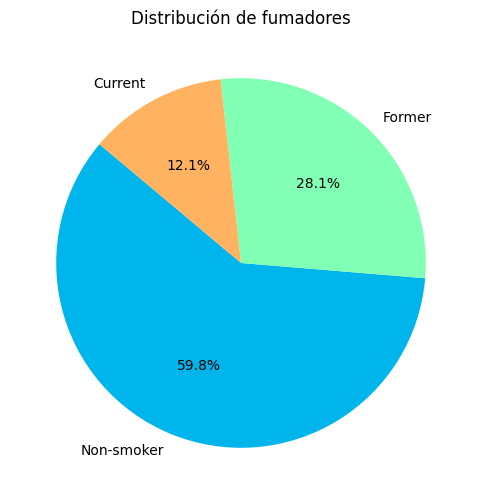

In [12]:
#Analizo cómo está distribuido el porcentaje de fumadores dentro del dataset
smoking_counts = depresion_df['Smoking Status'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("rainbow", len(smoking_counts)))

plt.title('Distribución de fumadores')

plt.show()

<ipython-input-13-938a454b3779>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=depresion_df, x='Physical Activity Level', y= 'Age',palette="rainbow")


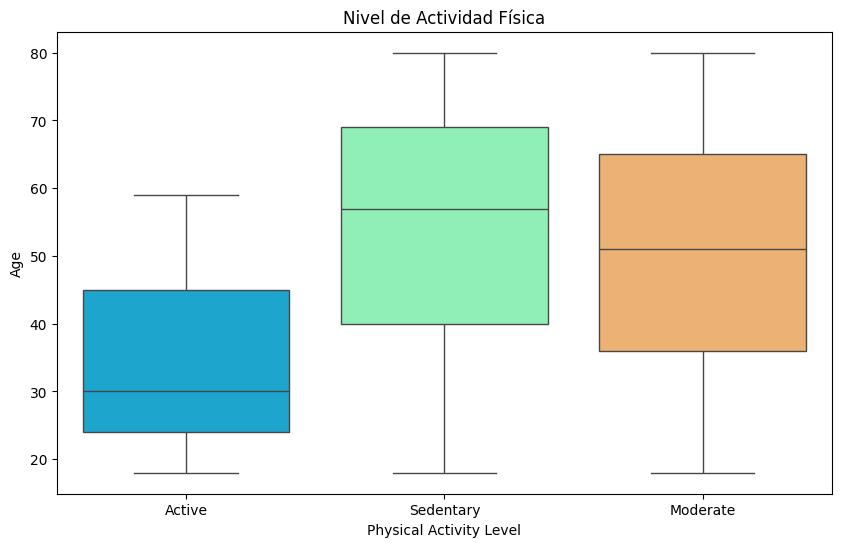

In [13]:
#Analizo la actividad física realizada en función de la edad
plt.figure(figsize=(10, 6))
sns.boxplot(data=depresion_df, x='Physical Activity Level', y= 'Age',palette="rainbow")
plt.title('Nivel de Actividad Física')
plt.show()

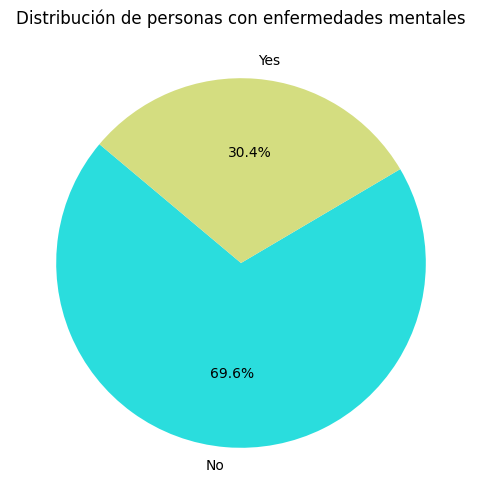

In [14]:
#Analizo cómo está distribuido el porcentaje de personas con enfermedades mentales dentro del dataset
mental_illness = depresion_df['History of Mental Illness'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(mental_illness, labels=mental_illness.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("rainbow", len(mental_illness)))

plt.title('Distribución de personas con enfermedades mentales')

plt.show()

**Conclusiones preliminares del análisis univariado**

En función de los análisis univariados realizados, se busca establecer la relevancia de características tales como fumar, el nivel de actividad física realizado y la distribución de la cantidad de personas con enfermedades mentales; para luego, en base a tales resultados, determinar si dichos factores son determinantes.

## Análisis bivariado

<ipython-input-15-614322fb6e8a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=depresion_df, x='Education Level', y='Income', palette="rainbow")


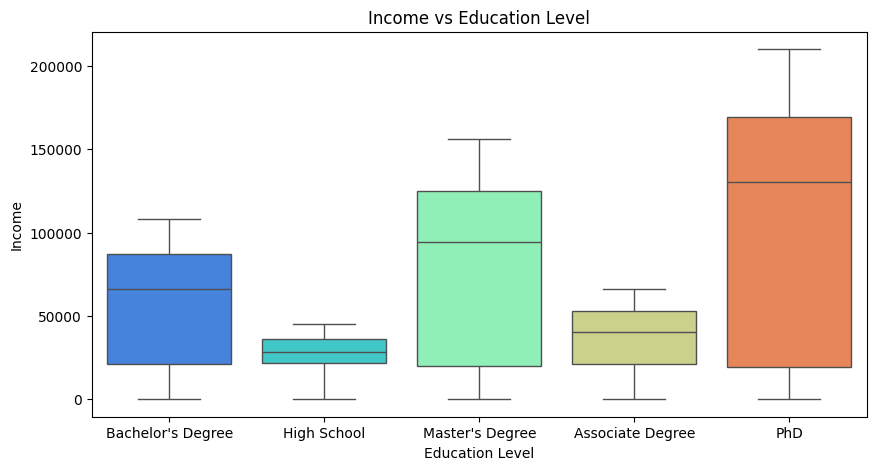

In [15]:
#Analizo la relación existente entre el nivel educativo y el ingreso obtenido (buscando outliers)
plt.figure(figsize=(10, 5))
sns.boxplot(data=depresion_df, x='Education Level', y='Income', palette="rainbow")
plt.title('Income vs Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()

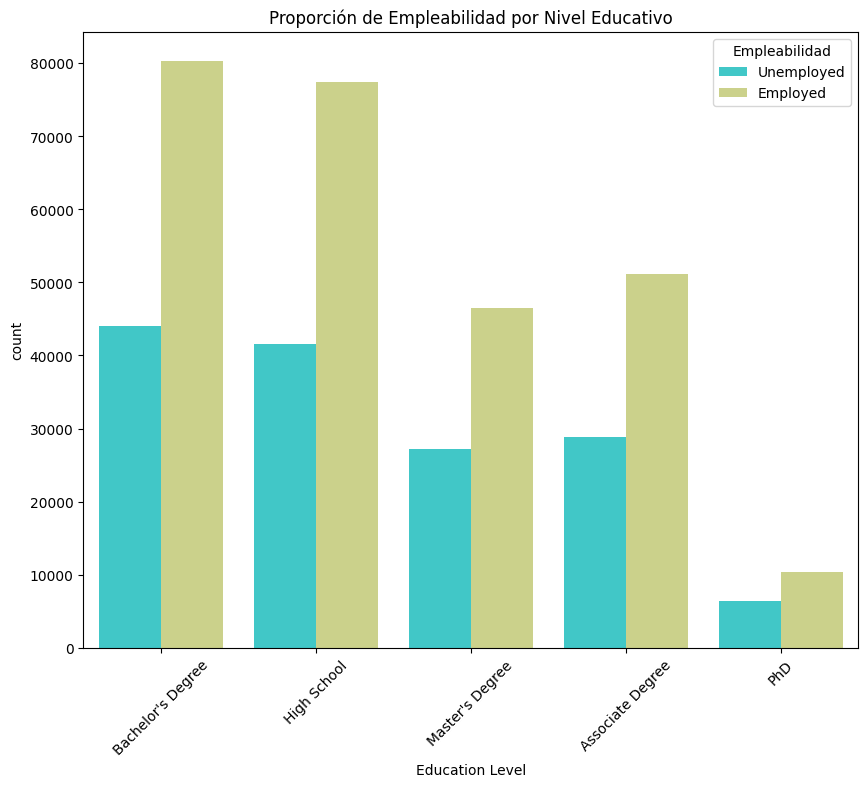

In [16]:
#Cantidad de empleados/desempleados en función del nivel de estudios
plt.figure(figsize=(10, 8))
sns.countplot(x='Education Level', hue='Employment Status', data=depresion_df, palette="rainbow")
plt.title('Proporción de Empleabilidad por Nivel Educativo')
plt.xticks(rotation=45)
plt.legend(title='Empleabilidad')
plt.show()

**Conclusiones preliminares del análisis bivariado**

Con este análisis se intenta arribar a la conclusión de si el nivel educativo alcanzado es determinante con la empleabilidad en el mundo actual; pudiendo ser relevante en el nivel de estres y posible depresión por no estar empleado.

# **Preprocesamiento de Datos**

Se procede al cambio de variables categóricas por numéricas (Label Encoding) en cada una de las columnas a ser utilizadas para el análisis. Para ello se utiliza la librería Pandas, importada al inicio del Notebook.

In [17]:
depresion_df.loc[depresion_df['Smoking Status'] == 'Non-smoker', 'Smoking Status'] = 0
depresion_df.loc[depresion_df['Smoking Status'] == 'Former', 'Smoking Status'] = 1
depresion_df.loc[depresion_df['Smoking Status'] == 'Current', 'Smoking Status'] = 2

In [18]:
depresion_df.loc[depresion_df['Physical Activity Level'] == 'Sedentary', 'Physical Activity Level'] = 0
depresion_df.loc[depresion_df['Physical Activity Level'] == 'Active', 'Physical Activity Level'] = 1
depresion_df.loc[depresion_df['Physical Activity Level'] == 'Moderate', 'Physical Activity Level'] = 2


In [19]:
depresion_df.loc[depresion_df['Employment Status'] == 'Employed', 'Employment Status'] = 1
depresion_df.loc[depresion_df['Employment Status'] == 'Unemployed', 'Employment Status'] = 0

In [20]:
depresion_df.loc[depresion_df['Alcohol Consumption'] == 'Low', 'Alcohol Consumption'] = 0
depresion_df.loc[depresion_df['Alcohol Consumption'] == 'Moderate', 'Alcohol Consumption'] = 1
depresion_df.loc[depresion_df['Alcohol Consumption'] == 'High', 'Alcohol Consumption'] = 2

In [21]:
depresion_df.loc[depresion_df['Dietary Habits'] == 'Unhealthy', 'Dietary Habits'] = 0
depresion_df.loc[depresion_df['Dietary Habits'] == 'Moderate', 'Dietary Habits'] = 1
depresion_df.loc[depresion_df['Dietary Habits'] == 'Healthy', 'Dietary Habits'] = 2

In [22]:
depresion_df.loc[depresion_df['Sleep Patterns'] == 'Poor', 'Sleep Patterns'] = 0
depresion_df.loc[depresion_df['Sleep Patterns'] == 'Fair', 'Sleep Patterns'] = 1
depresion_df.loc[depresion_df['Sleep Patterns'] == 'Good', 'Sleep Patterns'] = 2

In [23]:
depresion_df.loc[depresion_df['History of Mental Illness'] == 'Yes', 'History of Mental Illness'] = 1
depresion_df.loc[depresion_df['History of Mental Illness'] == 'No', 'History of Mental Illness'] = 0

In [24]:
depresion_df.loc[depresion_df['History of Substance Abuse'] == 'Yes', 'History of Substance Abuse'] = 1
depresion_df.loc[depresion_df['History of Substance Abuse'] == 'No', 'History of Substance Abuse'] = 0

In [25]:
depresion_df.loc[depresion_df['Family History of Depression'] == 'Yes', 'Family History of Depression'] = 1
depresion_df.loc[depresion_df['Family History of Depression'] == 'No', 'Family History of Depression'] = 0

In [26]:
depresion_df.loc[depresion_df['Chronic Medical Conditions'] == 'Yes', 'Chronic Medical Conditions'] = 1
depresion_df.loc[depresion_df['Chronic Medical Conditions'] == 'No', 'Chronic Medical Conditions'] = 0

In [27]:
depresion_df.head(15)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,0,1,0,26265.67,1,1,1,1,0,1,1
1,Jacqueline Lewis,55,Married,High School,1,0,0,1,42710.36,2,0,1,1,0,0,1
2,Shannon Church,78,Widowed,Master's Degree,1,0,0,1,125332.79,0,0,2,0,0,1,0
3,Charles Jordan,58,Divorced,Master's Degree,3,0,2,0,9992.78,1,1,0,0,0,0,0
4,Michael Rich,18,Single,High School,0,0,0,0,8595.08,0,1,1,1,0,1,1
5,Kathy Hill,20,Single,High School,0,1,1,1,44448.91,0,0,1,0,1,0,0
6,Crystal Delgado,60,Widowed,Associate Degree,1,0,0,0,22565.47,1,1,0,0,1,0,0
7,Charles Kaiser,31,Single,High School,0,0,1,1,39608.18,1,0,2,0,0,0,0
8,Kathryn Taylor,50,Divorced,Bachelor's Degree,0,0,1,1,93360.07,1,2,2,0,1,0,1
9,Alexander Hernandez,77,Married,Bachelor's Degree,2,0,0,1,77597.84,0,0,0,1,0,0,0


In [28]:
depresion_df['Total_Riesgo'] = depresion_df[['History of Mental Illness', 'Family History of Depression', 'Chronic Medical Conditions']].sum(axis=1)
depresion_df['Alto_Riesgo_Depresion'] = depresion_df['Total_Riesgo'].apply(lambda x: 1 if x >= 2 else 0)
print(depresion_df['Alto_Riesgo_Depresion'].value_counts())

Alto_Riesgo_Depresion
0    323817
1     89951
Name: count, dtype: int64


#**Análisis multivariado**


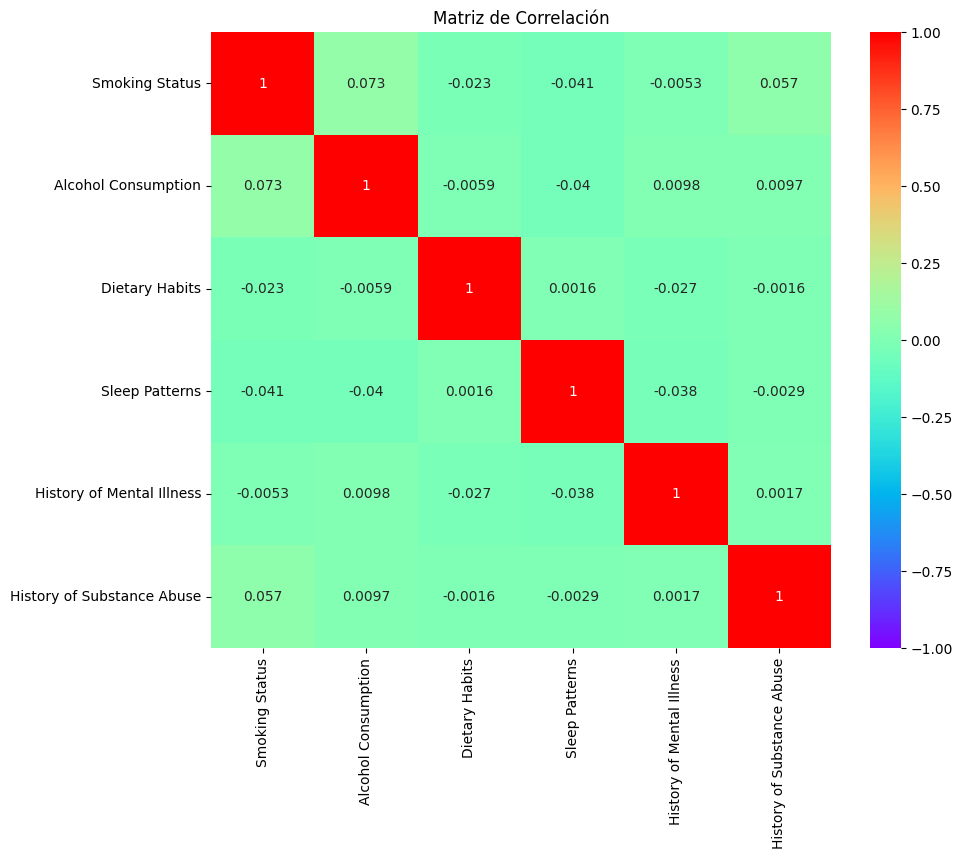

In [29]:
plt.figure(figsize=(10, 8))
correlation_matrix = depresion_df[['Smoking Status', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

**Conclusiones preliminares del análisis multivariado**

Con la matriz de correlación presentada y luego de haber realizado el Label Encoding, se intenta representar los factores más determinantes e influyentes en la problemática estudiada.

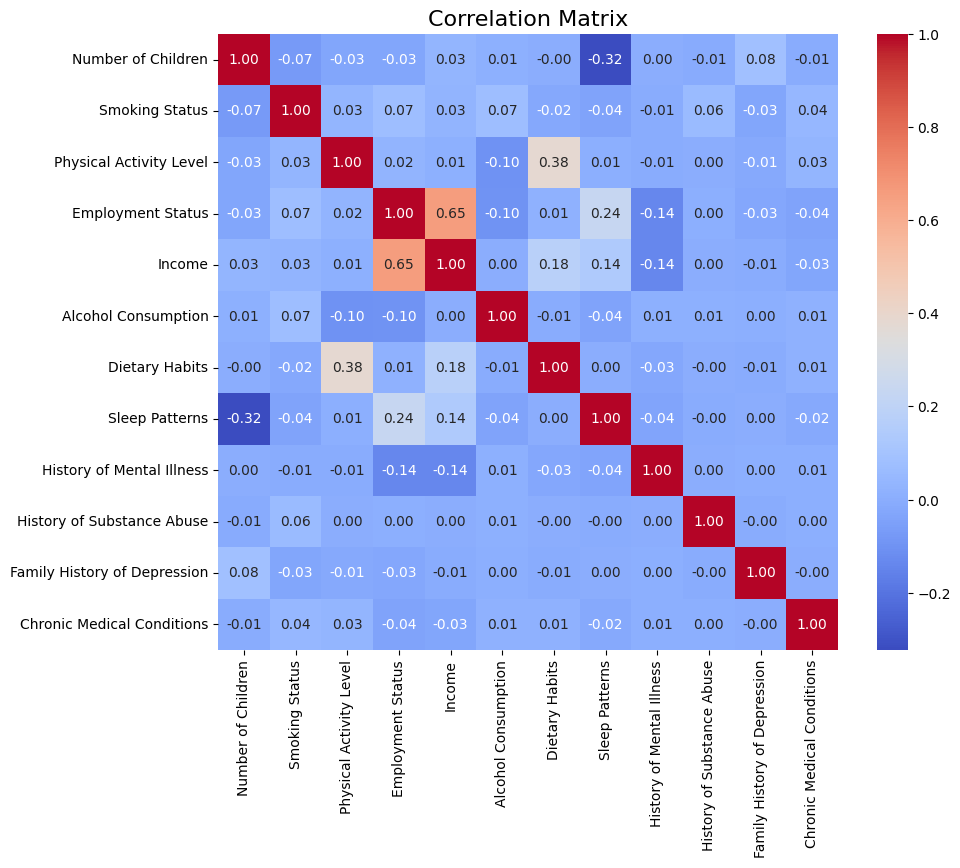

In [30]:
correlation_matrix = depresion_df[['Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

En función de lo observado, las características mas importantes para determinar si una persona o no puede sufrir de depresión son los ingresos y la situación de empleo (probablemente asociado al stress que generan dichos factores).

# **Feature Selection**

Dado que no poseo una variable objetivo definida en función de los datos obtenidos del dataset, procedo a la creación de una llamada "Riesgo_Depresión" y luego procedo a establecer el riesgo de padecer dicha enfermedad; considerando las características de "Historial de enfermedades mentales", "Historial Familiar de Depresión" y "Chronic Medical Conditions" como las variables dependientes de mayor influencia.

In [31]:
# Creo la columna de la variable objetivo
depresion_df['Riesgo_Depresion'] = 0

# Defino las condiciones que deben darse para que se asigne el valor "1" en caso de riesgo de depresión
condiciones = (
    (depresion_df['History of Mental Illness'] == 1) |
    (depresion_df['Family History of Depression'] == 1) |
    (depresion_df['Chronic Medical Conditions'] == 1)
)

# Asigno el valor "1" para "Si, posee riesgo"
depresion_df.loc[condiciones, 'Riesgo_Depresion'] = 1

In [32]:
# Con la variable "Alto_Riesgo_Depresion" busco conocer la cantidad de personas que poseen dicho riesgo, siendo 0 como "No posee" y 1: "Sí posee" en función si la sumatoria de las tres variables es mayor o igual a 2
depresion_df['Total_Riesgo'] = depresion_df[['History of Mental Illness', 'Family History of Depression', 'Chronic Medical Conditions']].sum(axis=1)
depresion_df['Alto_Riesgo_Depresion'] = depresion_df['Total_Riesgo'].apply(lambda x: 1 if x >= 2 else 0)
print(depresion_df['Alto_Riesgo_Depresion'].value_counts())

Alto_Riesgo_Depresion
0    323817
1     89951
Name: count, dtype: int64


In [33]:
depresion_df.head(15)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Total_Riesgo,Alto_Riesgo_Depresion,Riesgo_Depresion
0,Christine Barker,31,Married,Bachelor's Degree,2,0,1,0,26265.67,1,1,1,1,0,1,1,3,1,1
1,Jacqueline Lewis,55,Married,High School,1,0,0,1,42710.36,2,0,1,1,0,0,1,2,1,1
2,Shannon Church,78,Widowed,Master's Degree,1,0,0,1,125332.79,0,0,2,0,0,1,0,1,0,1
3,Charles Jordan,58,Divorced,Master's Degree,3,0,2,0,9992.78,1,1,0,0,0,0,0,0,0,0
4,Michael Rich,18,Single,High School,0,0,0,0,8595.08,0,1,1,1,0,1,1,3,1,1
5,Kathy Hill,20,Single,High School,0,1,1,1,44448.91,0,0,1,0,1,0,0,0,0,0
6,Crystal Delgado,60,Widowed,Associate Degree,1,0,0,0,22565.47,1,1,0,0,1,0,0,0,0,0
7,Charles Kaiser,31,Single,High School,0,0,1,1,39608.18,1,0,2,0,0,0,0,0,0,0
8,Kathryn Taylor,50,Divorced,Bachelor's Degree,0,0,1,1,93360.07,1,2,2,0,1,0,1,1,0,1
9,Alexander Hernandez,77,Married,Bachelor's Degree,2,0,0,1,77597.84,0,0,0,1,0,0,0,1,0,1


### Selección de variable objetivo y variables independientes

In [34]:
X = depresion_df.drop(['Alto_Riesgo_Depresion','Name', 'Marital Status', 'Education Level'], axis=1)
y = depresion_df['Alto_Riesgo_Depresion']

In [35]:
# Variables independientes
X.columns

Index(['Age', 'Number of Children', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Income',
       'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions',
       'Total_Riesgo', 'Riesgo_Depresion'],
      dtype='object')

In [36]:
# Variable dependiente
y.sample(15)

,Alto_Riesgo_Depresion
180350,1
282131,0
374323,1
76125,1
112607,0
411920,0
245454,1
76810,0
88271,0
79525,1


# **Machine Learning**

En el presente apartado se presentarán distintos modelos como ser: Regresión Lineal, Random Forest, Decission Tree y Knn; todos modelos para resolver un problema de clasificación.

## Regresión logística

In [37]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [38]:
#Determino las columnas X e Y para entrenar el modelo
train_col=['Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions']
X= depresion_df [train_col]
Y= depresion_df ['Alto_Riesgo_Depresion']

In [39]:
#Instancio las variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
#Realizo el fit del modelo
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [41]:
#Entreno el modelo
LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train)

LogisticRegression()

In [42]:
modelo_log = LogisticRegression.score(X_train, y_train)
print(f"Precisión del modelo: {modelo_log}")

Precisión del modelo: 1.0


## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [45]:
arbol=DecisionTreeClassifier(max_leaf_nodes=5)
arbol.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

## Random Forest


In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [47]:
X = depresion_df[['Number of Children','Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions']]

y = depresion_df['Alto_Riesgo_Depresion']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
random_for = RandomForestClassifier(n_estimators=100, random_state=42)
random_for.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

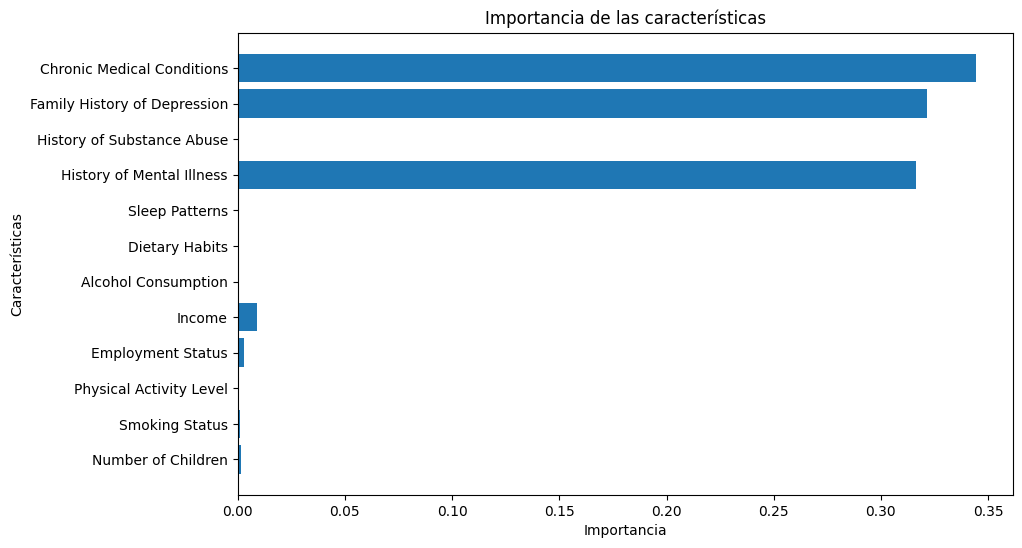

In [50]:

feature_importance = random_for.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.title("Importancia de las características")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

**Conclusión preliminar del modelo**
En función del gráfico arriba presentado, a priori Random Forest no sería una técnica válida para representar un correcto análisis dado que hay variables independientes importantes (como ser el historial médico de abuso de sustancias, el consumo de alcohol; por ejemplo) que según el modelo, no son importantes en el riesgo de contraer depresión.

## KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [53]:
modelo_knn=knn()

In [54]:
# Determino las variables dependientes e independientes en función de las más representativas según Random Forest
X = depresion_df[['Chronic Medical Conditions', 'Family History of Depression', 'History of Mental Illness']]
y = depresion_df['Alto_Riesgo_Depresion']

In [55]:
modelo_1=knn(n_neighbors=5)

In [56]:
modelo2=knn(n_neighbors=7)

In [57]:
modelo3=knn(n_neighbors=10)

In [58]:
# Importo y Procedo a realizar la CV de los modelos presentados
from sklearn.model_selection import cross_val_score

In [59]:
cross_val_score(modelo_1,X_train,y_train,cv=5)

array([0.76595882, 0.76803351, 0.76824297, 0.76709901, 0.76579393])

In [60]:
cross_val_score(modelo2,X_train,y_train,cv=5)

array([0.77233912, 0.77364054, 0.77488117, 0.77343108, 0.77249658])

In [61]:
cross_val_score(modelo3,X_train,y_train,cv=5)

array([0.77962169, 0.78098767, 0.78126158, 0.77976315, 0.7807621 ])

In [62]:
cross_val_score(modelo_1,X_train,y_train,cv=5).mean()

0.7670256474379504

In [63]:
cross_val_score(modelo2,X_train,y_train,cv=5).mean()

0.7733576980935378

In [64]:
cross_val_score(modelo3,X_train,y_train,cv=5).mean()

0.7804792407260355

En función de lo observado, el modelo ganador es el 3 por tener el promedio más alto en CV.

In [65]:
#Se procede a entrenar y evaluar el modelo ganador
modelo3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [66]:
y_pred=modelo3.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
validation_accuracy = accuracy_score(y_pred, y_test)
print(f"Precisión de validación: {validation_accuracy}")

Precisión de validación: 0.7844879256008198


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88     81218
           1       0.47      0.02      0.04     22224

    accuracy                           0.78    103442
   macro avg       0.63      0.51      0.46    103442
weighted avg       0.72      0.78      0.70    103442



## **Matriz de confusión**

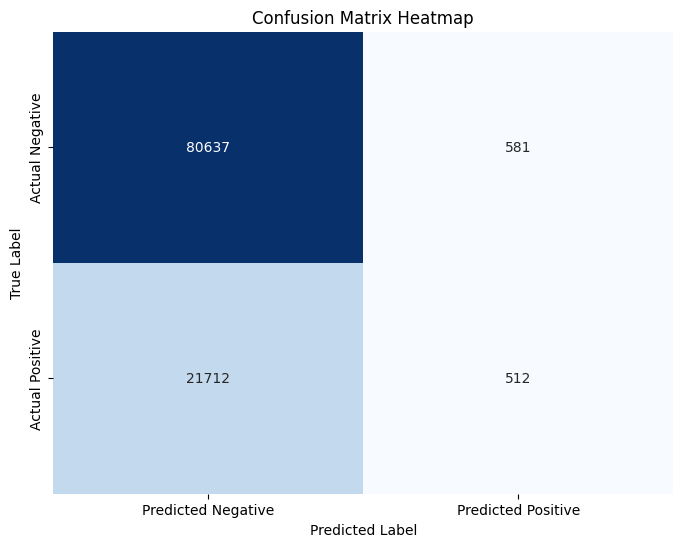

In [70]:
from sklearn.metrics import confusion_matrix
conf_matrix3 =confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

En función de la matriz de confusión, el modelo puede predecir bien los casos de no depresión pero no así los de depresión; con el consiguiente riesgo de no estar dandole tratamiento a las personas que lo necesitan.


In [71]:
confusion_matrix(y_test,y_pred)

array([[80637,   581],
       [21712,   512]])

In [72]:
from sklearn.metrics import roc_curve, auc

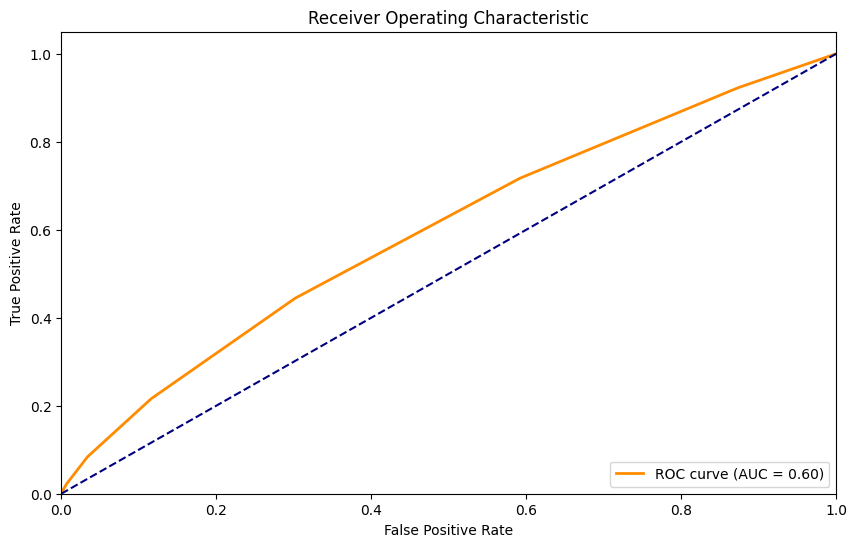

In [73]:
# Calculate probabilities for the positive class
y_probs = modelo3.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)  # Calculate and assign to a new variable

# Now plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

En función del gráfico de curva AUC ROC, se observa que el desempeño es moderado dado que algunas veces no puede discriminar entre la clase positiva y negativa de depresión

##Grid Search

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [76]:
#Se transforman columnas para poder realizar el GridSearch y comprobar que modelo ajusta mejor en comparación con otros
lista_numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
lista_categorical_features = X_train.select_dtypes(include=['object']).columns

In [77]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [78]:
categorical_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='most_frequent')),
      ('onehot', OneHotEncoder())])

In [79]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, lista_numeric_features),
        ('cat', categorical_transformer, lista_categorical_features)])

In [80]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Number of Children', 'Income'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 Index(['Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions'],
      dtype='object'))])

In [81]:
pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('estimator', LogisticRegression())])

In [82]:
pipe2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Number of Children', 'Income'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions'],
      dtype='object'))])),
                ('estimator', LogisticRegression())])

In [83]:
params_grid = [

               {
                'preprocessor__num__imputer__strategy' : ['mean', 'median'],
                'estimator':[KNeighborsClassifier()],
                'estimator__n_neighbors': [ 3, 5, 7 ],

                },

               {
                'estimator': [DecisionTreeClassifier()],
                'estimator__max_leaf_nodes': [ 5, 10, 15],
                'preprocessor__num__imputer__strategy' : ['mean', 'median']
                }

               , {
                'estimator': [GaussianNB()],
                'preprocessor__num__imputer__strategy' : ['mean', 'median']
                }
              , {
                'estimator': [LogisticRegression()],
                'preprocessor__num__imputer__strategy' : ['mean', 'median']
                }
              ,
               {
                'estimator': [RandomForestClassifier()],
                'preprocessor__num__imputer__strategy' : ['mean', 'median'],
                'estimator__n_estimators': [ 200, 300, 500],
                'estimator__max_depth': [5, 7, 9]

                }

              ]





In [84]:
from sklearn.model_selection import GridSearchCV

GS = GridSearchCV(pipe2, params_grid)

GS.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Number of Children', 'Income'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         Index(['...
                         {'estimator': [GaussianNB()],
                          'preprocessor__num__imputer__strategy': ['mean',
                                                                   'median']},
                         {'estimator': [LogisticRegression()],
                          'preprocessor__num__imputer__strategy': ['mean',
                                                                   'median']},
                         {'estimator': [RandomForestClassifier()],
                          'estimator__max_depth': [5, 7, 9],
                          'estimator__n_estimators': [200, 300, 500],
                          'preprocessor__num__imputer__strategy': ['mean',
                                                                   'median']}])

In [85]:
import pandas as pd
pd.DataFrame(GS.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__n_neighbors,param_preprocessor__num__imputer__strategy,param_estimator__max_leaf_nodes,param_estimator__max_depth,param_estimator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.163531,0.231379,115.806038,0.636301,KNeighborsClassifier(),3.0,mean,NaN,NaN,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.998953,0.999098,0.998872,0.999130,0.998953,0.999001,0.000097,31
1,1.304569,0.290450,115.770610,0.548693,KNeighborsClassifier(),3.0,median,NaN,NaN,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.998953,0.999098,0.998872,0.999130,0.998953,0.999001,0.000097,31
2,1.234343,0.252273,115.874000,0.598057,KNeighborsClassifier(),5.0,mean,NaN,NaN,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.998985,0.999356,0.999017,0.999162,0.999130,0.999130,0.000131,29
3,1.278415,0.298302,115.698487,0.768242,KNeighborsClassifier(),5.0,median,NaN,NaN,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.998985,0.999356,0.999017,0.999162,0.999130,0.999130,0.000131,29
4,1.442080,0.510978,123.763373,12.602342,KNeighborsClassifier(),7.0,mean,NaN,NaN,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.999194,0.999162,0.999243,0.999065,0.999162,0.999165,0.000058,27
5,1.354189,0.287806,119.217093,7.093911,KNeighborsClassifier(),7.0,median,NaN,NaN,NaN,"{'estimator': KNeighborsClassifier(), 'estimat...",0.999194,0.999162,0.999243,0.999065,0.999162,0.999165,0.000058,27
6,1.726094,0.277663,0.196600,0.047928,DecisionTreeClassifier(),NaN,mean,5.0,NaN,NaN,"{'estimator': DecisionTreeClassifier(), 'estim...",0.938259,0.939950,0.938887,0.939016,0.939016,0.939025,0.000541,33
7,1.796452,0.308711,0.201914,0.048900,DecisionTreeClassifier(),NaN,median,5.0,NaN,NaN,"{'estimator': DecisionTreeClassifier(), 'estim...",0.938259,0.939950,0.938887,0.939016,0.939016,0.939025,0.000541,33
8,1.520057,0.015016,0.176528,0.005749,DecisionTreeClassifier(),NaN,mean,10.0,NaN,NaN,"{'estimator': DecisionTreeClassifier(), 'estim...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
9,1.822706,0.355529,0.204657,0.052166,DecisionTreeClassifier(),NaN,median,10.0,NaN,NaN,"{'estimator': DecisionTreeClassifier(), 'estim...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1


In [87]:
GS.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Number of Children', 'Income'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions'],
      dtype='object'))])),
                ('estimator', DecisionTreeClassifier(max_leaf_nodes=10))])

In [88]:
GS.best_params_

{'estimator': DecisionTreeClassifier(),
 'estimator__max_leaf_nodes': 10,
 'preprocessor__num__imputer__strategy': 'mean'}

In [89]:
# Entrenamiento del modelo final
modelo_final=GS.best_estimator_

In [90]:
modelo_final.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Number of Children', 'Income'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions'],
      dtype='object'))])),
                ('estimator', DecisionTreeClassifier(max_leaf_nodes=10))])

In [91]:
modelo_final.score(X_test,y_test)

1.0

In [86]:
grid_cv = RandomizedSearchCV(pipe2, params_grid, n_iter=10)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)


Mejores parametros {'preprocessor__num__imputer__strategy': 'median', 'estimator': LogisticRegression()}
Mejor score de CV 1.0


### ***Conclusión***
No es buen estimador ya que da un score de 1.0 y eso no es factible. Se debería reducir la dimensionalidad y homogeneizar aun mas las categorías y los valores para hacer un buen estimador posible.